In [52]:
import time
from pathlib import Path
import glob
import os
import numpy as np
from tqdm import tqdm
import itertools
import csv
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import IPython.display as ipd
from IPython.display import clear_output


import torch
import torchaudio
import soundfile as sf
from torchaudio.transforms import Vad

import wave
import librosa
import contextlib

# vad for vad list
from utils import *
import random
import shutil
from tqdm import tqdm

In [31]:
def plot_spec(filepath):
    samplingFrequency, signalData = wavfile.read(filepath)
    
    # Plot the signal read from wav file
    plt.subplot(211)

    plt.title('Spectrogram of a wav file')

    plt.plot(signalData)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)
    plt.specgram(signalData,Fs=samplingFrequency,NFFT=512)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.show()

def get_duration_file(fn_audio):
    with contextlib.closing(wave.open(str(fn_audio),'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    return duration

def get_duration_folder(folder):
    total_length = 0
    for audio in glob.glob(f"{folder}/*.wav"):
        try:
            total_length += get_duration_file(audio)
        except:
            print("error in ",audio)
    return total_length

def get_size_file(fname):
    return Path(fname).stat().st_size

def get_size_folder(folder):
    return sum([float(get_size_file(f)) for f in glob.glob(f"{folder}/*")])

# get_duration_folder("dataset/dump")

In [2]:
root = 'dataset/train/'

In [5]:
folders = glob.glob(str(Path(root, '*')))
len(folders)

71523

In [22]:
def stream_and_plot_audio(path, plot=False):
    audio = ipd.Audio(path, autoplay=True) 
    ipd.display(audio)
    if plot:
        plot_spec(path)

def stream_and_plot_in_class(folder):
    audio_in_folder = glob.glob(f'{folder}/*.wav')
    for i, f in enumerate(audio_in_folder):
        path  = str(Path(f))
        print(f"[{i + 1}/{len(audio_in_folder)}] {path}", end=' ')

        stream_and_plot_audio(path)

        duration = librosa.get_duration(filename=path)
        # print(duration, end='\n\n')
        time.sleep(duration + 0.5)
        
def stream_and_plot_in_root():
    nfiles = [len(os.listdir(x)) for x in folders]
    start_id = 0

    for index, folder in enumerate(folders):
        print(folders[index], 'id:', index, 'count:', sum(nfiles[:index]))
        
        stream_and_plot_in_class(folder)
        time.sleep(1.0)
        clear_output(wait=True)

## Visualize each file

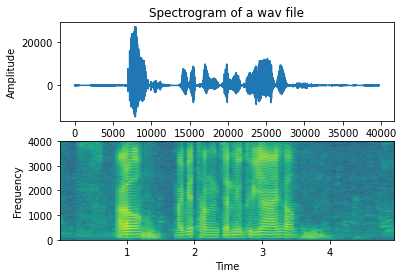

ffprobe version 4.3.1 Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-17ubuntu1~20.04)
  configuration: 
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
Input #0, wav, from 'dataset/dump/366524143-20211229-084534_5.wav':
  Metadata:
    encoder         : Lavf57.83.100
  Duration: 00:00:04.97, bitrate: 128 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 8000 Hz, 1 channels, s16, 128 kb/s


In [32]:
path = f"dataset/dump/366524143-20211229-084534_5.wav"
stream_and_plot_audio(path, plot=True)
!ffprobe dataset/dump/366524143-20211229-084534_5.wav

dataset/test/2083758475/20210813093407-FBJVVXWY-134435_50407-10.61.85.11-vt_cskh_ohsthuy2672_cc1-374520620-58475-0000811905-2083758475-CTM_1.wav

In [87]:
os.listdir("dataset/dump/")

['sample.mp3',
 'speaker_272_augmented_1.wav',
 'speaker_272_augmented_2.wav',
 'speaker_272-10_augmented_2.wav',
 'speaker_272_augmented_4.wav',
 'speaker_272-10_augmented_1.wav',
 'speaker_272-10_augmented_3.wav',
 'speaker_272_augmented_3.wav',
 'speaker_272-11_augmented_1.wav',
 'speaker_272-11_augmented_2.wav',
 'speaker_272-10_augmented_4.wav',
 '.ipynb_checkpoints',
 'sample.wav',
 'sample_8k.wav',
 'test_ds.wav',
 'speaker_272_augmented_3_conv.wav',
 'speaker_272_augmented_4_conv.wav',
 'test.wav',
 'dump.wav',
 'vv Check log.zip',
 '366524143-20211229-084350_1.wav',
 '366524143-20211229-084350_5.wav',
 '366524143-20211229-084534_1.wav',
 '366524143-20211229-084350_3.wav',
 '366524143-20211229-084441_1.wav',
 '366524143-20211229-084441_5.wav',
 '366524143-20211229-084441_3.wav',
 '366524143-20211229-084534_3.wav',
 '366524143-20211229-084534_5.wav',
 'thuyth.wav',
 'thuyth_vad_0.wav',
 'thuyth_vad_1.wav',
 '366524143-20211229-084350_1_vad_0.wav',
 '366524143-20211229-084350_3_v

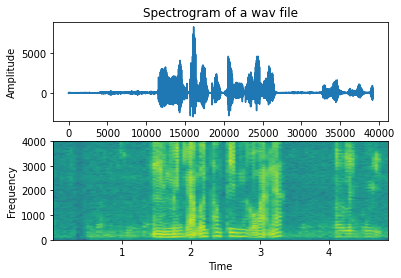

ffprobe version 4.3.1 Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-17ubuntu1~20.04)
  configuration: 
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
Input #0, wav, from 'dataset/dump/thuyth.wav':
  Metadata:
    encoder         : Lavf57.83.100
  Duration: 00:00:05.67, bitrate: 128 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 8000 Hz, 1 channels, s16, 128 kb/s


In [105]:
path = f"dataset/dump/366524143-20211229-084441_5.wav"
# path = f"dataset/test/2083758475/20210813093407-FBJVVXWY-134435_50407-10.61.85.11-vt_cskh_ohsthuy2672_cc1-374520620-58475-0000811905-2083758475-CTM_1.wav"
stream_and_plot_audio(path, plot=True)
!ffprobe dataset/dump/thuyth.wav

### Perform vad on long file(>10s of duration)

In [83]:
from utils import *
path = f"dataset/dump/366524143-20211229-084534_1.wav"
write = True
segments = VAD(win_length=180, frame_duration=30).detect(path, write=write, show=True)
print(len(segments))

TypeError: exceptions must derive from BaseException

## Visualize whole dataset

In [8]:
origin = "dataset/train/"
filenames = glob.glob(f"{origin}/*")

### number of files

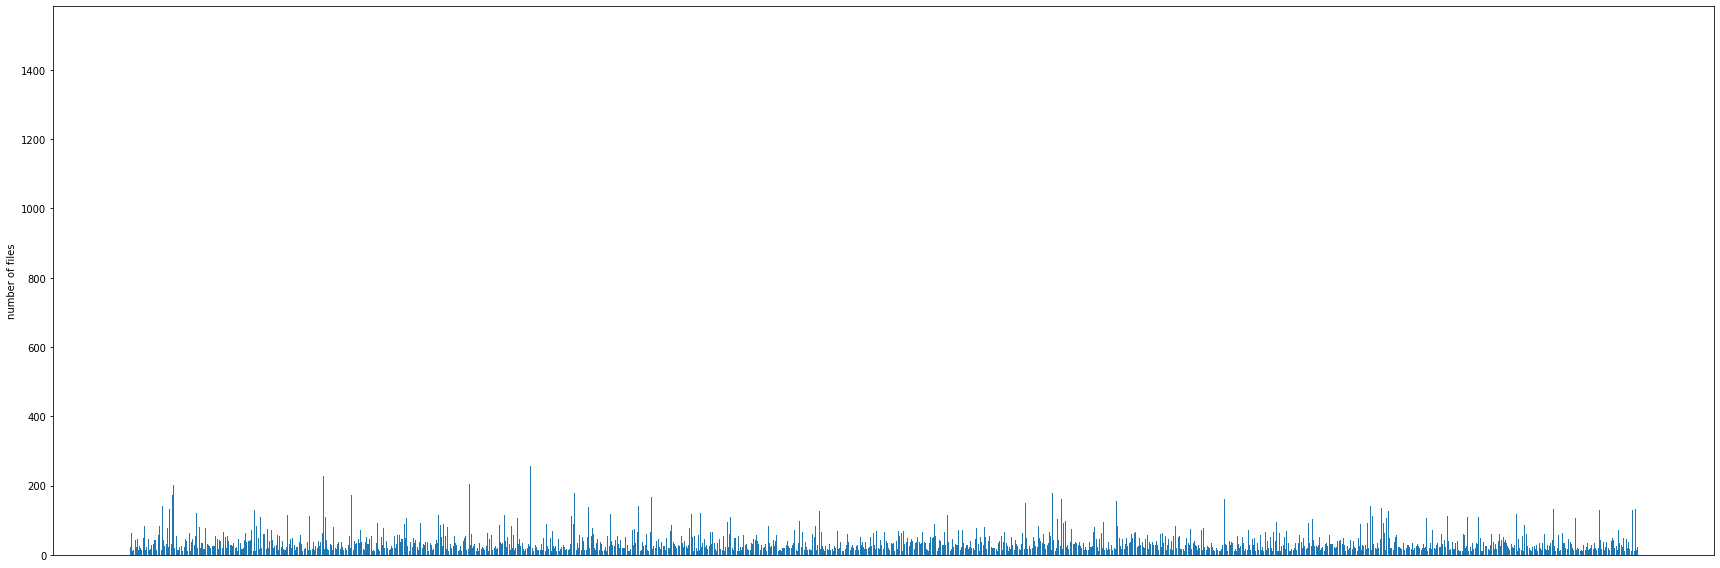

In [6]:
# so luong files moi nguoi
no_of_files = []
for f in filenames:
    if len(os.listdir(f)) == 0:
        print(f)
    no_of_files.append(len(os.listdir(f)))
plt.figure(figsize=(24, 8))
plt.bar(filenames, no_of_files), plt.ylabel('number of files'), plt.xticks([])
plt.tight_layout()

In [11]:
filenames[np.argmax(no_of_files)], filenames[np.argmin(no_of_files)], sum(no_of_files), max(no_of_files), min(no_of_files)

('dataset/train/2835449000', 'dataset/train/983728826', 2672459, 1508, 11)

### Duration

100%|██████████| 71523/71523 [04:00<00:00, 296.97it/s]


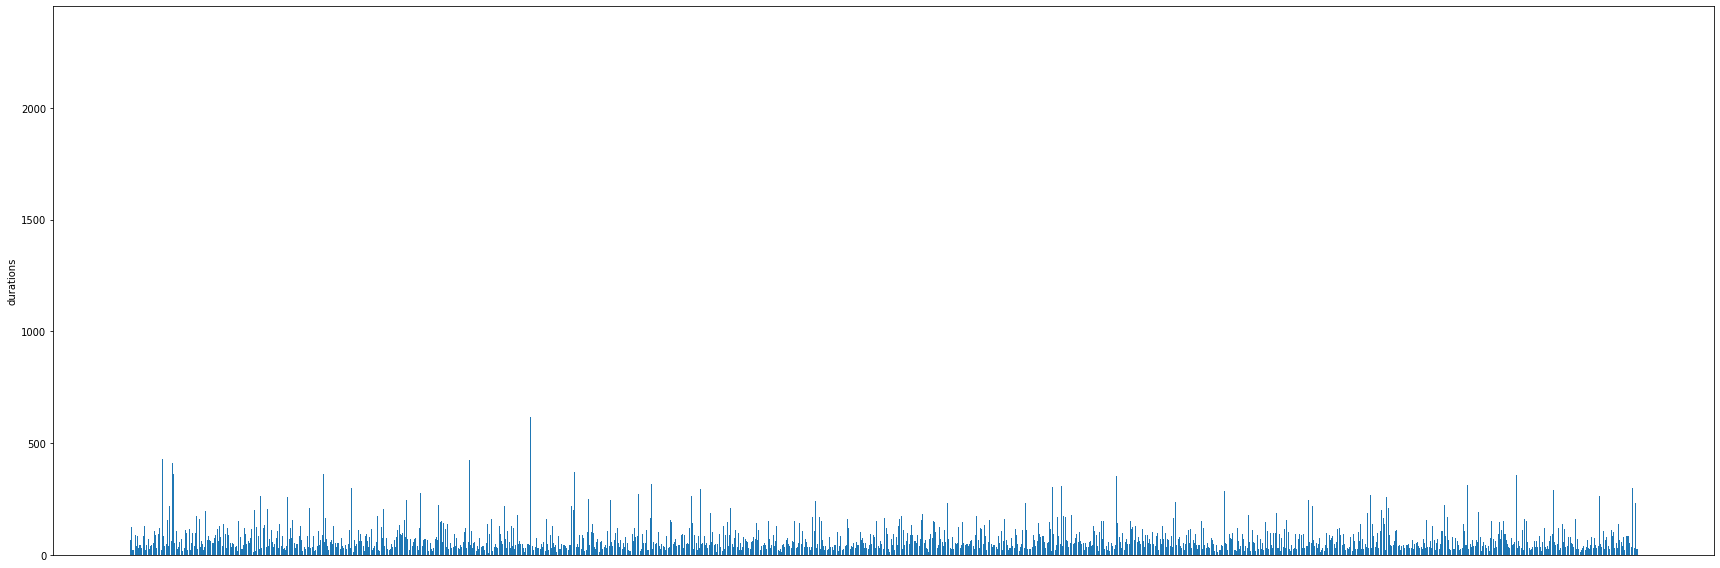

In [12]:
# duration
durations = []
for fn in tqdm(filenames):
    length = get_duration_folder(fn)
    durations.append(length)
plt.figure(figsize=(24, 8))
plt.bar(filenames, durations), plt.ylabel('durations'), plt.xticks([]), plt.tight_layout()
plt.show()

In [13]:
np.mean(durations), np.argmax(durations), sum(durations), max(durations), min(durations)

(73.61833459866057,
 277,
 5265404.1455000285,
 2336.5131250000036,
 7.720000000000001)

### average duration 

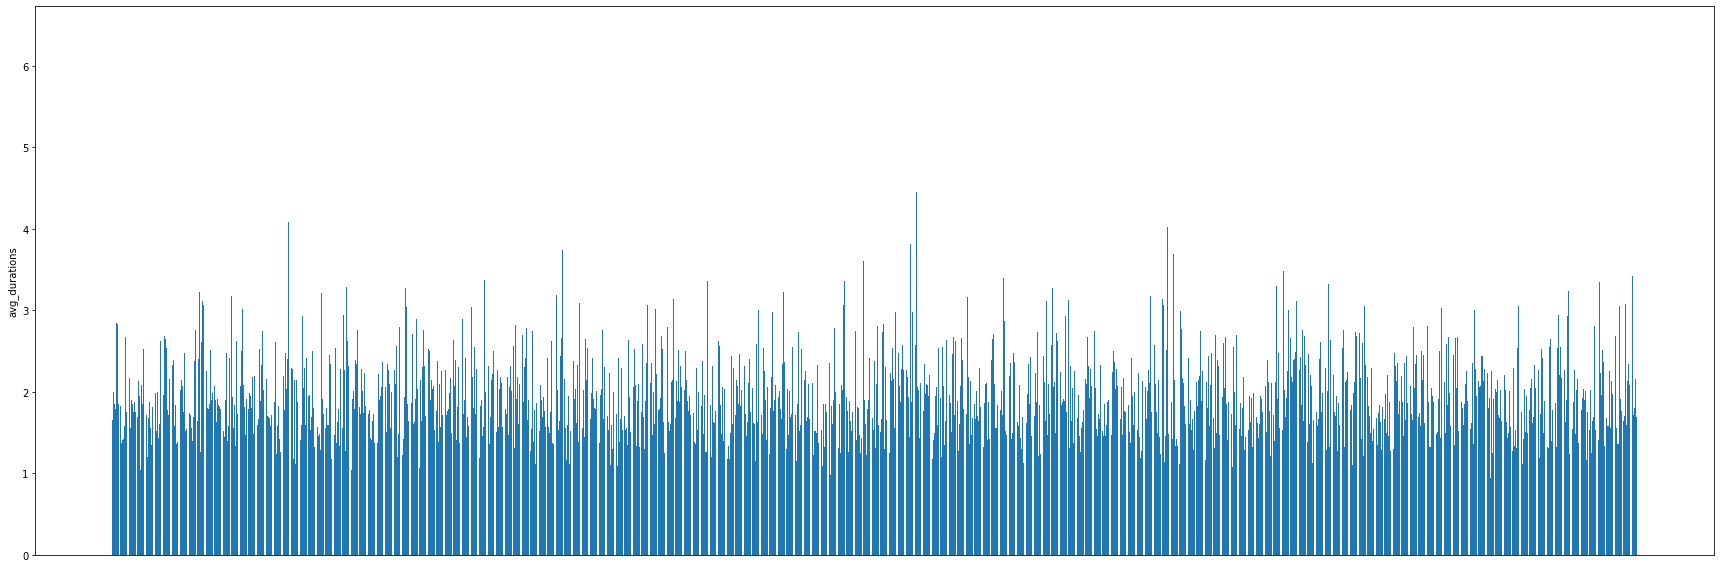

In [14]:
# mat do thoi gian / 1 audio tren moi nguoi
import numpy as np
no_of_files = np.array(no_of_files)
durations = np.array(durations)
avg_durations = np.divide(durations, no_of_files)
plt.figure(figsize=(24, 8))
plt.bar(filenames, avg_durations), plt.ylabel('avg_durations'), plt.xticks([]), plt.tight_layout()
plt.show()

In [15]:
avg_durations.mean(), np.argmax(avg_durations), max(avg_durations), min(avg_durations)

(1.970128755926274, 15041, 6.409989583333334, 0.7018181818181819)

In [16]:
len(avg_durations[(avg_durations >= 1.5).nonzero()])

58740

## Filtering DATASET

Check the inequality of dataset and print out details, return number of files greater ans lower than threshold(35 files)

In [36]:
root = Path("dataset/train")
audio_folder_num = {}
for audio_folder in tqdm(root.iterdir()):
    audio_folder_num[audio_folder.name] = len(os.listdir(audio_folder))

audio_folder_duration = {}
for audio_folder in tqdm(root.iterdir()):
    audio_folder_duration[audio_folder.name] = sum([get_duration_file(audio_file) for audio_file in audio_folder.iterdir()])


def filtering_data(lower_bound = 40, upper_bound = 50, dur = 3):
    '''to check the inequality of dataset from wavs folder
    '''
    mean_num = np.mean(list(audio_folder_num.values()))
    
    print("Total files:", sum(audio_folder_num.values()))
    print("mean number of audio files each folder", mean_num)
    print("min and max of number of files:", min(audio_folder_num.values()), max(audio_folder_num.values()))
    print(list(audio_folder_num.keys())[np.argmin(list(audio_folder_num.values()))])
    
    greater_than_mean = [k for k, v in audio_folder_num.items() if v > 1.1 * mean_num]
    lower_than_mean = [k for k, v in audio_folder_num.items() if v < 0.9 * mean_num]
    lower_than_thresh = [k for k, v in audio_folder_num.items() if v < lower_bound]
    greater_than_thresh = [k for k, v in audio_folder_num.items() if v > upper_bound]
    valid_num = [k for k, v in audio_folder_num.items() if (lower_bound < v < upper_bound)]
    
    print('//===================================')
    # check for the total duration of each folder

    mean_duration = np.mean(list(audio_folder_duration.values()))
    print("Total size:", sum(audio_folder_duration.values())/1e6, "s")
    print("mean duration of audio files each folder", mean_duration, "s")
    print("min and max of duration:", min(audio_folder_duration.values()), max(audio_folder_duration.values()), "s")
    
    greater_than_mean_duration = [k for k, v in audio_folder_duration.items() if v > 1.1 * mean_duration]
    lower_than_mean_duration = [k for k, v in audio_folder_duration.items() if v < 0.9 * mean_duration]
    valid_dur =  [k for k, v in audio_folder_duration.items() if v >= dur]

    print('//===================================')

    long_large = np.intersect1d(greater_than_mean, greater_than_mean_duration)
    short_small = np.intersect1d(lower_than_mean, lower_than_mean_duration)
    long_small = np.setxor1d(greater_than_mean, long_large)
    short_large = np.setxor1d(lower_than_mean, short_small)
    
    valid_file =  np.intersect1d(valid_num, valid_dur)


    print("greater than mean in number of files:", len(greater_than_mean))
    print("lower than mean in number of files:", len(lower_than_mean))
    print("greater than mean in duration:", len(greater_than_mean_duration))
    print("lower than mean in duration:", len(lower_than_mean_duration))
    
    print('//===================================')

    print("long_large:", len(long_large))
    print("short_small:", len(short_small))
    print("long_small:", len(long_small))
    print("short_large:", len(short_large))
  
    return valid_file

71523it [00:03, 19384.89it/s]
71523it [02:30, 476.47it/s]


In [37]:
filtering_data(30,50,3)

Total files: 2672459
mean number of audio files each folder 37.3650294310921
min and max of number of files: 11 1508
983728826
//===================================
Total size: 5.265404145500028 s
mean duration of audio files each folder 73.61833459866057 s
min and max of duration: 7.720000000000001 2336.5131250000036 s
//===================================
greater than mean in number of files: 19679
lower than mean in number of files: 44225
greater than mean in duration: 20355
lower than mean in duration: 44332
//===================================
long_large: 16912
short_small: 40495
long_small: 2767
short_large: 3730


array(['2103623789', '2103846285', '2106566669', ..., '989992455',
       '989993409', '989999923'], dtype='<U11')